# Overview: 

This notebook is created to do tasks given in this issue: https://github.com/mozilla/PRESC/issues/2




### Tasks: 

- load a dataset from the repo
- train a classification model from **scikit-learn**
- compute an evaluation metric on a held-out test set

### Optional: 

- basic exploratory analysis of the dataset
- data preprocessing
- hyperparameter tuning





In [158]:
# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from ggplot import *
%matplotlib inline

#importing libraries for Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_blobs

#from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import ValidationCurve

# importing startup_helper script to bring up an interactive visualization of the decision tree building process
import startup_helper

# Relevant Papers
In their paper "The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. (Yeh I. C. & Lien C. H.,2009)", which can be found [here](https://bradzzz.gitbooks.io/ga-dsi-seattle/content/dsi/dsi_05_classification_databases/2.1-lesson/assets/datasets/DefaultCreditCardClients_yeh_2009.pdf), Yeh I. C. & Lien C. H. review six data mining techniques (discriminant analysis, logistic regression, Bayesclassifier, nearest neighbor, artificial neural networks, and classification trees) and their applications on credit scoring. Then, using the real cardholders’ credit risk data in Tai-wan, they compare the classification accuracy among them.

# Dataset 

Model development requires careful selection of attributes

- Adding irrelevant attributes act as noise and requires an effort from the model to learn to ignore. They also cost computation.
- Dropping relevant attributes make it difficult for model to learn to make the correct prediction
- Further, incorrectly chosen attributes, sometimes (in case of Target Leakage), can give false impression of excellent model 

. 

This dataset is available on: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#


This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

*X1:* Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

*X2:* Gender (1 = male; 2 = female).

*X3:* Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

*X4:* Marital status (1 = married; 2 = single; 3 = others).

*X5:* Age (year).

*X6 - X11:* History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

*X12-X17:* Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

*X18-X23:* Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.


#### Attribute Descripition

Now if we look at the .csv file, we can see there are 25 variables:

**ID**
- *id:* ID of each client

**Numeric Variables**
- *limit_bal*: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- *bill_amt1*: Amount of bill statement in September, 2005 (NT dollar)
- *bill_amt2*: Amount of bill statement in August, 2005 (NT dollar)
- *bill_amt3*: Amount of bill statement in July, 2005 (NT dollar)
- *bill_amt4*: Amount of bill statement in June, 2005 (NT dollar)
- *bill_amt5*: Amount of bill statement in May, 2005 (NT dollar)
- *bill_amt6*: Amount of bill statement in April, 2005 (NT dollar)
- *pay_amt1*: Amount of previous payment in September, 2005 (NT dollar)
- *pay_am2*: Amount of previous payment in August, 2005 (NT dollar)
- *pay_am3*: Amount of previous payment in July, 2005 (NT dollar)
- *pay_am4*: Amount of previous payment in June, 2005 (NT dollar)
- *pay_am5*: Amount of previous payment in May, 2005 (NT dollar)
- *pay_am6*: Amount of previous payment in April, 2005 (NT dollar)

**Ordinal Variables**
- *pay_0*: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)
- *pay_2*: Repayment status in August, 2005 (scale same as above)
- *pay_3*: Repayment status in July, 2005 (scale same as above)
- *pay_4*: Repayment status in June, 2005 (scale same as above)
- *pay_5*: Repayment status in May, 2005 (scale same as above)
- *pay_6*: Repayment status in April, 2005 (scale same as above)

**Categorical Variables**
- *sex*: Gender (1 = male, 2 = female)
- *education*: (1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 = unknown, 6 = unknown)
- *marriage*: Marital status (1 = married, 2 = single, 3 = others)
- *age*: Age in years

**Target / Label**
- *defaulted*: Default payment (1=yes, 0=no)


**Detailed Attribute Analysis**

I have analysisd the attributes in detailes because detailed analysis allows one to get a detailed picture of dataset. It helps to discover:

- Extent of missing values in each columns
- Range of categorical values each attribute takes along with frequency of each
- Average values of numeric attributes
- Anomalous/extreme/outlier values present in data
- Deviations, if any, from the data dictionary
- Irrelevant attributes(e.g. attributes that take only one value)
- Distribution of target labels

## Loading dataset
The most important part of the Pandas library is the DataFrame. A DataFrame holds the type of data you might think of as a table. This is similar to a sheet in Excel, or a table in a SQL database. Reading the data into a pandas dataframe using read_csv() function of pandas.

In [5]:
df = pd.read_csv("../../datasets/defaults.csv")
df.head(5) #Taking a peek at top 5 rows of data using the head function of dataframe.

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.describe()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaulted
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


The results show 8 numbers for each column in my dataset.

The first number, **the count**, shows how many rows have non-missing values. I can see all columns have 30000 non-missing values, means there is no missing value.

The second value is the **mean**, which is the average. Under that, **std** is the standard deviation, which measures how numerically spread out the values are.

To interpret the **min**, **25%**, **50%**, **75%** and **max** values, if I sort each column from lowest to highest value, the first (smallest) value is the min. If I go a quarter way through the list, I'll see a number that is bigger than 25% of the values and smaller than 75% of the values. That is the 25% value. The 50th and 75th percentiles are defined analogously, and the max is the largest number.



In [4]:
df.info() # to look into more details to the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
id           30000 non-null int64
limit_bal    30000 non-null int64
sex          30000 non-null int64
education    30000 non-null int64
marriage     30000 non-null int64
age          30000 non-null int64
pay_0        30000 non-null int64
pay_2        30000 non-null int64
pay_3        30000 non-null int64
pay_4        30000 non-null int64
pay_5        30000 non-null int64
pay_6        30000 non-null int64
bill_amt1    30000 non-null int64
bill_amt2    30000 non-null int64
bill_amt3    30000 non-null int64
bill_amt4    30000 non-null int64
bill_amt5    30000 non-null int64
bill_amt6    30000 non-null int64
pay_amt1     30000 non-null int64
pay_amt2     30000 non-null int64
pay_amt3     30000 non-null int64
pay_amt4     30000 non-null int64
pay_amt5     30000 non-null int64
pay_amt6     30000 non-null int64
defaulted    30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


### Observations

- There are 30,000 distinct credit card clients.

- The average value for the amount of credit card limit is 167,484. The standard deviation is unusually large, max value being 1M.

- Education level is mostly graduate school and university.

- Most of the clients are either marrined or single (less frequent the other status).

- Average age is 35.5 years, with a standard deviation of 9.2.

- As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

- Here is no missing value in this dataset.

Using shape attribute to obtain size of dataset. 

In [5]:
print(df.shape)
print(df.shape[0])

(30000, 25)
30000


To choose variables/columns, I'll need to see a list of all columns in the dataset. That is done with the columns property of the DataFrame (the bottom line of code below).

In [6]:
df.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'defaulted'],
      dtype='object')

In [6]:
# Categorical variables description
df[['sex', 'education', 'marriage']].describe()

,sex,education,marriage
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


*education* has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.
*marriage* has a label 0 that is undocumented

In [7]:
# Payment delay description
df[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].describe()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [8]:
# Bill Statement description
df[['bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']].describe()

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Here I can see some values are negative . 

In [9]:
#Previous Payment Description
df[['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']].describe()

,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [10]:
df.limit_bal.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: limit_bal, dtype: float64

In [8]:
df = df.rename(columns={'defaulted': 'def_pay','pay_0': 'pay_1'})
df.head()

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


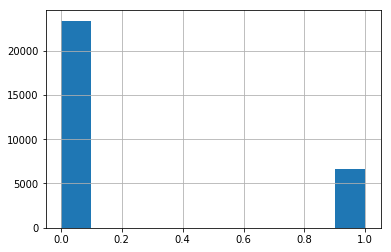

In [9]:
df['def_pay'].hist()

# Data exploration

## Categorical variables

That are sex, marriage, education, I want to see both how our dataset is divided and if there are sparse classes which can cause overfit of our models.

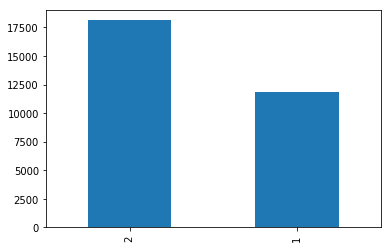

In [56]:
df.sex.value_counts().plot(kind = 'bar')

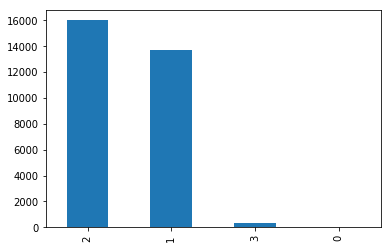

In [57]:
df.marriage.value_counts().plot(kind = 'bar')

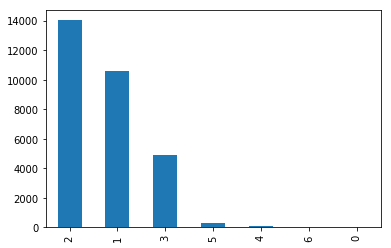

In [58]:
df.education.value_counts().plot(kind = "bar")

## Numerical variables


In [59]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

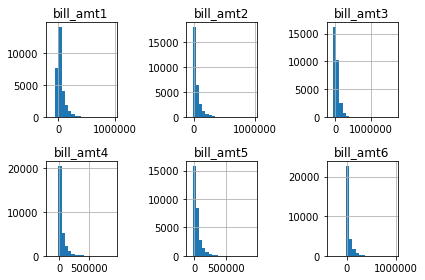

In [60]:
bills = df[['bill_amt1','bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

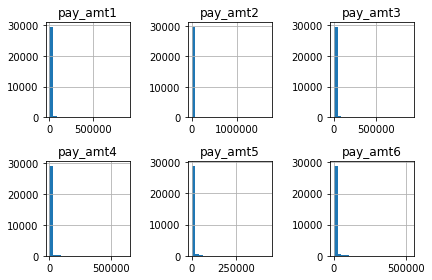

In [61]:
pay = df[['pay_amt1','pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']]
draw_histograms(pay, pay.columns, 2, 3, 20)

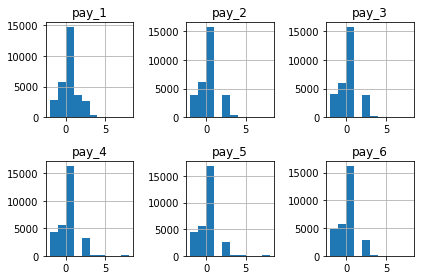

In [62]:
late = df[['pay_1','pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]
draw_histograms(late, late.columns, 2, 3, 10)

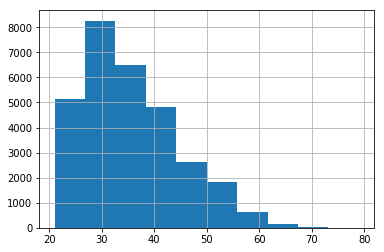

In [63]:
df.age.hist()

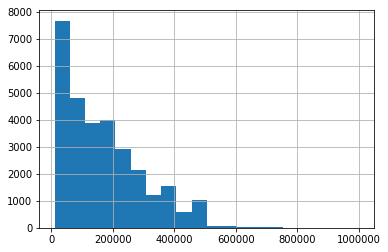

In [64]:
df.limit_bal.hist(bins = 20)

What I observe is that the quantities referred to some amount of money have a very large range, which can cause problems to some some models (for example in linear regression models)

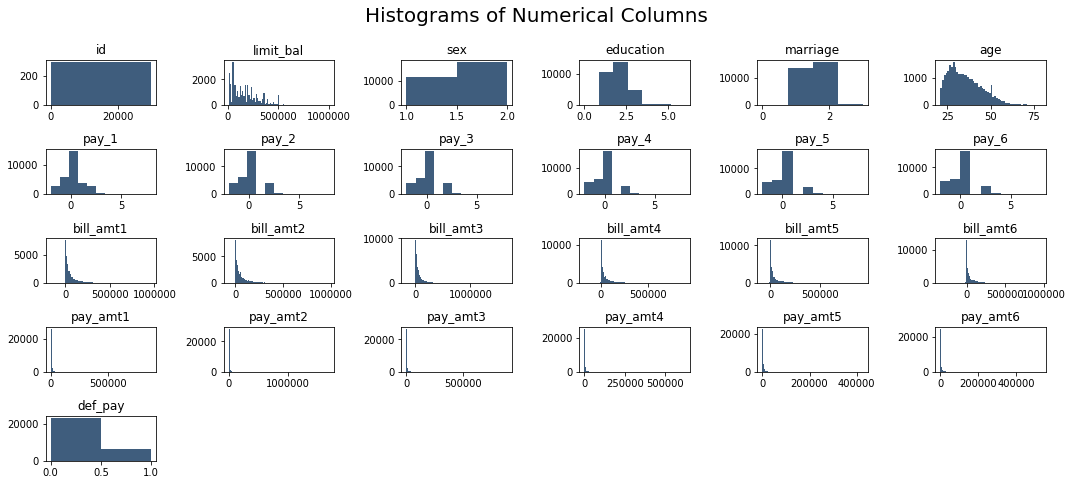

In [65]:
## Histograms
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df.shape[1]):
    plt.subplot(9, 6, i + 1)
    f = plt.gca()
    f.set_title(df.columns.values[i])

    vals = np.size(df.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Correlation matrix
Here is the correlation matrix. Although some columns are categorical data type,they have numeric values so we can directly use df.corr. If categorical values were string, we have to get rid of them.

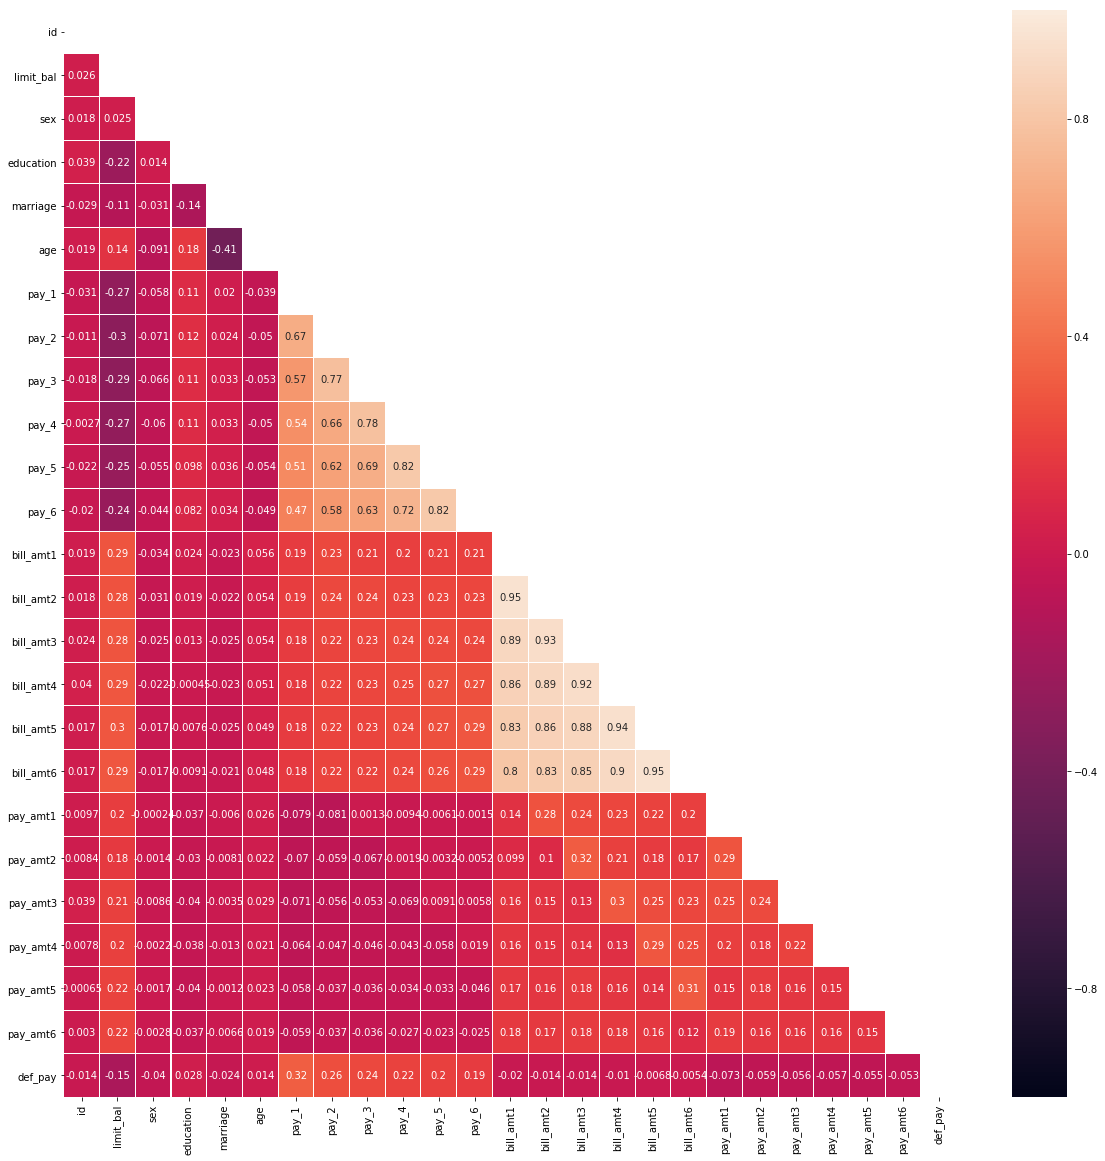

In [66]:
## .corr generate correlation matrix in df columns.
corr = df.corr()
## np.zeros_like generates matrix which is same shape with correlation matrix so we can use it like mask for inner triangle matrix. 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1, annot = True, mask = mask)

Let's look at the distributions of features with seaborn pair plot. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

In [67]:
## Preparing data for pairplotting
df_vis = df[['limit_bal','pay_1','pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']] 
df_vis2 = df[['bill_amt1','bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6','age']]

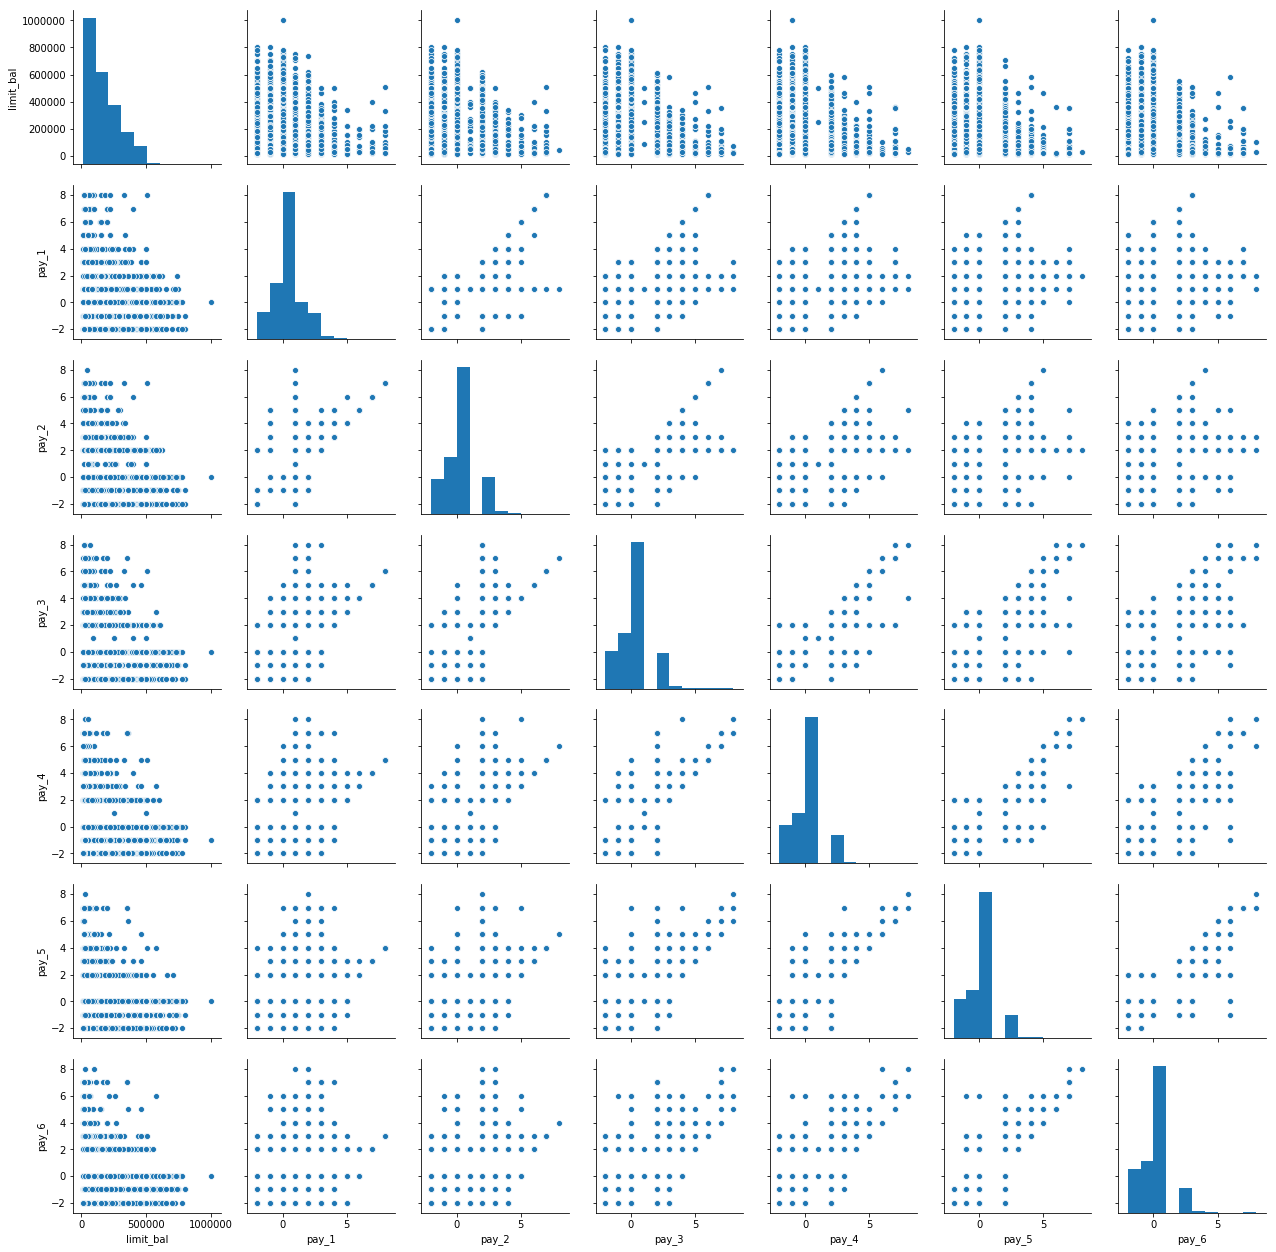

In [68]:
pp1 = sns.pairplot(df_vis)

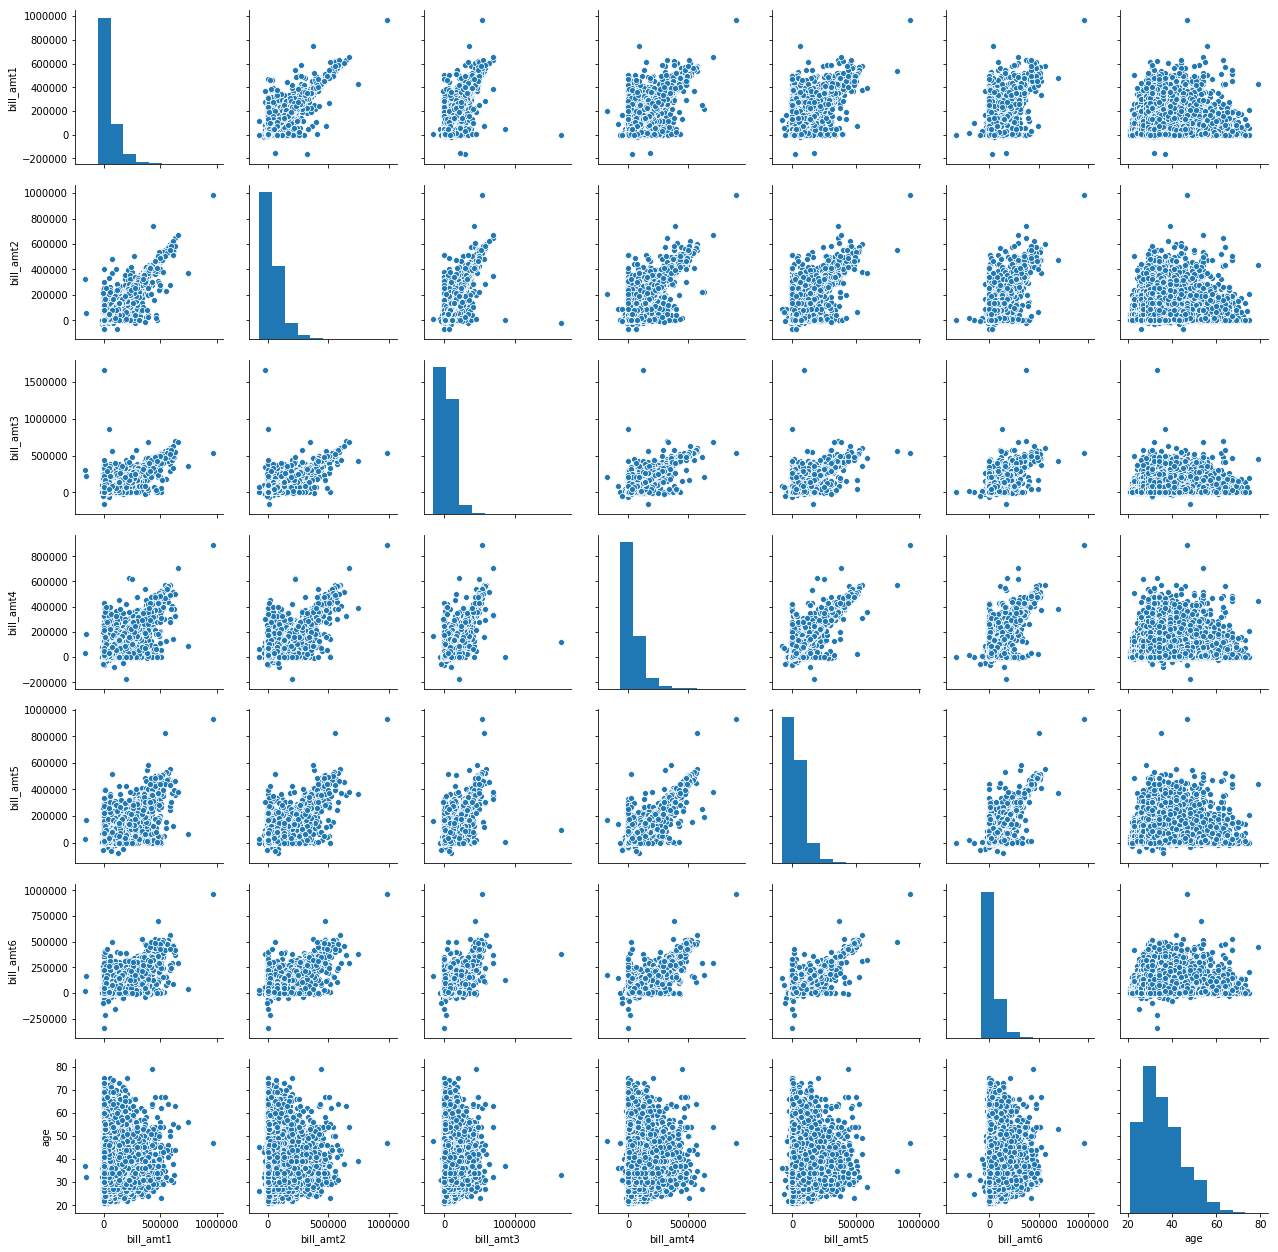

In [69]:
pp2 = sns.pairplot(df_vis2)

Here we can see, numerical features does not seem normally distributed.

In [70]:
def corr_2_cols(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [71]:
corr_2_cols('education', 'def_pay')

def_pay,0,1,perc
education,,,
0,14.0,NaN,NaN
1,8549.0,2036.0,0.192348
2,10700.0,3330.0,0.237349
3,3680.0,1237.0,0.251576
4,116.0,7.0,0.056911
5,262.0,18.0,0.064286
6,43.0,8.0,0.156863


# Feature Engineering

All machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristic to work properly. Here, the need for feature engineering arises.

Feature engineering efforts mainly have two goals:
- Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
- Improving the performance of machine learning models.

'The features you use influence more than everything else the result. No algorithm alone, to my knowledge, can supplement the information gain given by correct feature engineering.'
— Luca Massaron


I saw that men are most likely to default and also that married people are most likely to default. Here I will combine them in a single variable given by the product of the two. I chose these two first because they are both labeled 1,2 and they both decrease the probability of defaulting if their value increase. According to our models, sex and marriage are the least important variables.

This operation will create a category for married man, a combination of married women and single man, a category (expected to be numerically less populated) of "divorced" men (in other words, the "other" in marriage times the "male" in sex), one for single women and one for "divorced" women.

In [143]:
df['SE_MA'] = df.sex * df.marriage
corr_2_cols('SE_MA', 'def_pay')

def_pay,0,1,perc
SE_MA,,,
0,49,5,0.092593
1,3844,1346,0.259345
2,11677,3345,0.222673
3,91,40,0.305344
4,7555,1856,0.197216
6,148,44,0.229167


There is another way to do this.

In [144]:
df['SE_MA_2'] = 0
df.loc[((df.sex == 1) & (df.marriage == 1)) , 'SE_MA_2'] = 1 #married man
df.loc[((df.sex == 1) & (df.marriage == 2)) , 'SE_MA_2'] = 2 #single man
df.loc[((df.sex == 1) & (df.marriage == 3)) , 'SE_MA_2'] = 3 #divorced man
df.loc[((df.sex == 2) & (df.marriage == 1)) , 'SE_MA_2'] = 4 #married woman
df.loc[((df.sex == 2) & (df.marriage == 2)) , 'SE_MA_2'] = 5 #single woman
df.loc[((df.sex == 2) & (df.marriage == 3)) , 'SE_MA_2'] = 6 #divorced woman
corr_2_cols('SE_MA_2', 'def_pay')

def_pay,0,1,perc
SE_MA_2,,,
0,49,5,0.092593
1,3844,1346,0.259345
2,5068,1485,0.226614
3,91,40,0.305344
4,6609,1860,0.219625
5,7555,1856,0.197216
6,148,44,0.229167


The second one seems better because I can see clearly that married men have a higher probability of defaulting, single men have nothing special with respect to the all population and single women have a low probability of defaulting. Among the divorced, men have more troubles (but these categories are not very much populated).

It can be useful to create age categories. We can do it in three ways.

First, we can create a column and put a bunch of filters to fill it with the help of loc.

In [145]:
del df['SE_MA']
df = df.rename(columns={'SE_MA_2': 'SE_MA'})

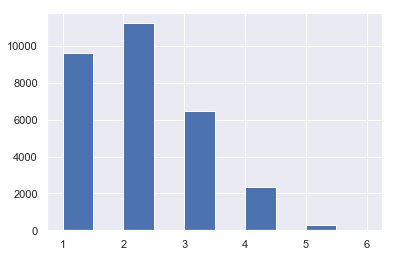

In [146]:
df['AgeBin'] = 0 #creates a column of 0
df.loc[((df['age'] > 20) & (df['age'] < 30)) , 'AgeBin'] = 1
df.loc[((df['age'] >= 30) & (df['age'] < 40)) , 'AgeBin'] = 2
df.loc[((df['age'] >= 40) & (df['age'] < 50)) , 'AgeBin'] = 3
df.loc[((df['age'] >= 50) & (df['age'] < 60)) , 'AgeBin'] = 4
df.loc[((df['age'] >= 60) & (df['age'] < 70)) , 'AgeBin'] = 5
df.loc[((df['age'] >= 70) & (df['age'] < 81)) , 'AgeBin'] = 6
df.AgeBin.hist()

Here I can control for how big the bins are but I can see how loc works but we still have some problems here.

Now I will use the second method:


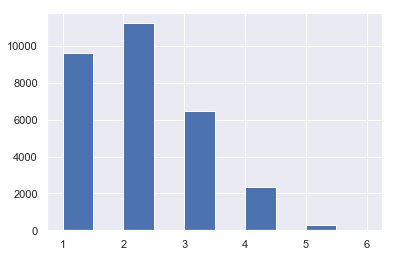

In [147]:
bins = [20, 29, 39, 49, 59, 69, 81]
bins_names = [1, 2, 3, 4, 5, 6]
df['AgeBin2'] = pd.cut(df['age'], bins, labels=bins_names)
df.AgeBin2.hist()

Here 2 things are noticeable:

- the bins have to be defined in a slightly counter intuitive way (at first) due to the fact that it includes the upper limit. You can play with the option "right" that is True by default
- the bins names have to be less numerous than the bins, i.e. with one bin you do bins = [20,81] and bins_names = [ 1 ].

The a faster way of doing 6 bins with cut, at the price of losing control on how big these bins are

In [148]:
df['AgeBin3'] = pd.cut(df['age'], 6)
df.AgeBin3.value_counts()

(20.942, 30.667]    11013
(30.667, 40.333]    10713
(40.333, 50.0]       6005
(50.0, 59.667]       1930
(59.667, 69.333]      314
(69.333, 79.0]         25
Name: AgeBin3, dtype: int64

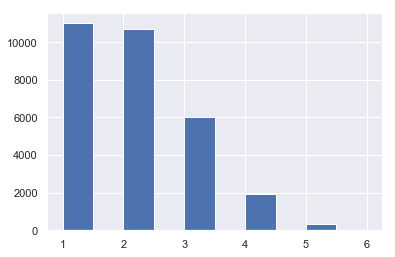

In [149]:
df['AgeBin3'] = pd.cut(df['age'], 6, labels=bins_names) 
df.AgeBin3.hist()

Another way of cutting a countinuos variable can be with a quantile-based discretization. This is done by the function qcut, which is a Quantile-based discretization function.

This can be useful if, for example, one has outliers (like in the balance variable it is possible there will be some) because those outliers would just fall into the extremal categories.

In [150]:
df['AgeBin4'] = pd.qcut(df['age'], 6)
df.AgeBin4.value_counts()

(26.0, 30.0]      5886
(34.0, 39.0]      5160
(20.999, 26.0]    5127
(30.0, 34.0]      4683
(45.0, 79.0]      4669
(39.0, 45.0]      4475
Name: AgeBin4, dtype: int64

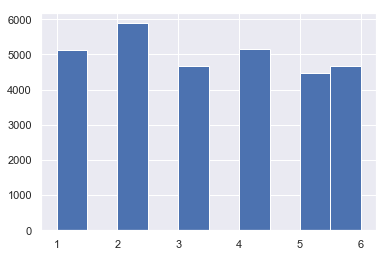

In [151]:
df['AgeBin4'] = pd.qcut(df['age'], 6, labels=bins_names)
df.AgeBin4.hist()

We don't need all of them, so to get rid to the category 6 since it is not populated enough and can distroy the model, I will group it with the 5, effectively treating every client over 60 in the same way.


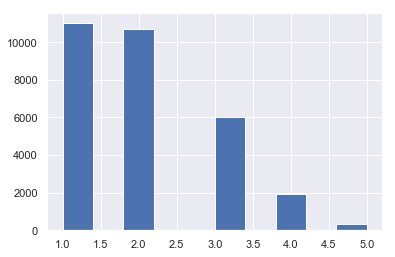

In [152]:
del df['AgeBin2']
del df['AgeBin3']
del df['AgeBin4'] # we don't need these any more
df['AgeBin'] = pd.cut(df['age'], 6, labels = [1,2,3,4,5,6])
#because 1 2 3 ecc are "categories" so far and we need numbers
df['AgeBin'] = pd.to_numeric(df['AgeBin'])
df.loc[(df['AgeBin'] == 6) , 'AgeBin'] = 5
df.AgeBin.hist()

In [153]:
corr_2_cols('AgeBin', 'def_pay')

def_pay,0,1,perc
AgeBin,,,
1,8542,2471,0.224371
2,8524,2189,0.204331
3,4606,1399,0.232973
4,1449,481,0.249223
5,243,96,0.283186


In [154]:
corr_2_cols('AgeBin', 'sex')

sex,1,2,perc
AgeBin,,,
1,3842,7171,0.651140
2,4363,6350,0.592738
3,2587,3418,0.569192
4,917,1013,0.524870
5,179,160,0.471976


I see that default probability goes down in  30's and then goes higher and higher. At the same time, the percentage of men is growing with the age category. Thus I want to combine the two as before and create a combination of the two.

In [155]:
df['SE_AG'] = 0
df.loc[((df.sex == 1) & (df.AgeBin == 1)) , 'SE_AG'] = 1 #man in 20's
df.loc[((df.sex == 1) & (df.AgeBin == 2)) , 'SE_AG'] = 2 #man in 30's
df.loc[((df.sex == 1) & (df.AgeBin == 3)) , 'SE_AG'] = 3 #man in 40's
df.loc[((df.sex == 1) & (df.AgeBin == 4)) , 'SE_AG'] = 4 #man in 50's
df.loc[((df.sex == 1) & (df.AgeBin == 5)) , 'SE_AG'] = 5 #man in 60's and above
df.loc[((df.sex == 2) & (df.AgeBin == 1)) , 'SE_AG'] = 6 #woman in 20's
df.loc[((df.sex == 2) & (df.AgeBin == 2)) , 'SE_AG'] = 7 #woman in 30's
df.loc[((df.sex == 2) & (df.AgeBin == 3)) , 'SE_AG'] = 8 #woman in 40's
df.loc[((df.sex == 2) & (df.AgeBin == 4)) , 'SE_AG'] = 9 #woman in 50's
df.loc[((df.sex == 2) & (df.AgeBin == 5)) , 'SE_AG'] = 10 #woman in 60's and above
corr_2_cols('SE_AG', 'def_pay')

def_pay,0,1,perc
SE_AG,,,
1,2929,913,0.237637
2,3350,1013,0.232180
3,1939,648,0.250483
4,666,251,0.273719
5,131,48,0.268156
6,5613,1558,0.217264
7,5174,1176,0.185197
8,2667,751,0.219719
9,783,230,0.227048


## One-Hot-Encoding


- education
- marriage
- sex

These are categorical features. They can't be represented as numbers (only bit values).

In [165]:
#Preping Education Feature for One-Hot

education_list = list(np.linspace(0,0,len(df)))
temp_list = list(df['education'].values)
for i in range(len(df)):
    if temp_list[i] == 1:
        education_list[i] = 'Graduate'
    elif temp_list[i] == 2:
        education_list[i] = 'Undergraduate'
    elif temp_list[i] == 3:
        education_list[i] = 'High School'
    elif temp_list[i] == 4:
        education_list[i] = 'Others'
    else:
        # 5 and 6 represent "Unknown".
        education_list[i] = 'Unknown'
education_list = pd.DataFrame(data=education_list, columns=["education"])

# One Hot Encode Education, Marriage and Sex
df_education_one_hot = pd.get_dummies(education_list['education'], prefix="education")
df_marriage_one_hot = pd.get_dummies(df['marriage'], prefix="marriage")
df_sex_one_hot = pd.get_dummies(df['sex'], prefix="sex")

df_education_one_hot.head()

,education_Graduate,education_High School,education_Others,education_Undergraduate,education_Unknown
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


## Bucketing

Throwing the following variables into buckets.

- limit_bal
- age 

Considering this values for bucketing because small difference in these values do not matter. 

In [162]:
#Making a Quantile Cut for Bucketing of LIMIT BAL
cut_df = pd.qcut(df['limit_bal'], q=3)
df_quantile_LimBal = pd.DataFrame(data=cut_df, columns=["limit_bal"])

df_limbal = pd.get_dummies(df_quantile_LimBal['limit_bal'], prefix="limit_bal")

display(df_limbal.head())

#Bucketing Age Feature by Manual Interval Selection
age_list = list(np.linspace(0,0,len(df)))
temp_list = list(df['age'].values)
for i in range(len(df)):
    if temp_list[i] >= 20 and temp_list[i] < 30:
        age_list[i] = '[20-30)'
    elif temp_list[i] >= 30 and temp_list[i] < 40:
        age_list[i] = '[30-40)'
    elif temp_list[i] >= 40 and temp_list[i] < 50:
        age_list[i] = '[40-50)'
    elif temp_list[i] >= 50 and temp_list[i] < 60:
        age_list[i] = '[50-60)'
    elif temp_list[i] >= 60 and temp_list[i] < 70:
        age_list[i] = '[60-70)'
    else:
        age_list[i] = '[70-Death)'

df_age = pd.DataFrame(data=age_list, columns=["age"])
df_age = pd.get_dummies(df_age['age'], prefix="age")

df_age.head()

,"limit_bal_(9999.999, 80000.0]","limit_bal_(80000.0, 200000.0]","limit_bal_(200000.0, 1000000.0]"
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


,age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-Death)
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0


# Machine Learning Model

**The steps to building and using a model:**

- Define: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
- Fit: Capture patterns from provided data. This is the heart of modeling.
- Predict: Just what it sounds like
- Evaluate: Determine how accurate the model's predictions are.

**How do model performance be measured**

- During training we want the model to learn just the right level of rules for classification
- If model learns more detailed rules than necessary, it will make correct predictions on existing data but incorrect predictions on new data
- If model learns less detailed rules than necessary, it will make incorrect predicitons on existing data as well as new data


There are many models that can be used for classification, like, Logistic Regression, Decision Trees, Neural Networks. Various models differ in what types of rules they can create to do classification and how they discovered those rules from the data.

Here I used Decision Trees for classifying data in this task.


In [10]:
df = df.rename(columns={'defaulted': 'def_pay','pay_0': 'pay_1'})
df.head()

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Decision tree

Decision Trees are a class of very powerful Machine Learning model cable of achieving high accuracy in many tasks while being highly interpretable. What makes decision trees special in the realm of ML models is really their clarity of information representation. The *knowledge* learned by a decision tree through training is directly formulated into a hierarchical structure. This structure holds and displays the knowledge in such a way that it can easily be understood, even by non-experts.


The Tree is very easy to use and imagine, it can handle both numerical and categorical variables, but it is easy to fall into the trap of overfitting (i.e. creating a very complex model that perfectly describes training set but fails in predicting). It is also said to be senstive to small changes in the data, leading to different results. For this reason, it is common to use ensembles such as Random Forest to avoid this risk.

There are a few parameters to be settle for the classifier, such as the function to determine the quality of a split, or how deep the tree has to be. We will first test it with a random choice of those parameters and then see a better process.

Decison trees create a rules in form of a tree like flowchart. Decision trees are available in sklearn.tree library in form of class DecisionTreeClassifier.

In [11]:
# creating the target variable
y = df['def_pay'].copy()
y.sample(5)

24960    0
9652     0
17392    0
6337     0
1926     0
Name: def_pay, dtype: int64

The columns that are inputted into our model (and later used to make predictions) are called "features" and By convention, this data is called X.

In [12]:
# creating the features, which now will be everything in the original df
features = ['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
X = df[features].copy()
X.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6'],
      dtype='object')



**Random state:** Many machine learning models allow some randomness in model training. Specifying a number for random_state ensures get the same results in each run. I use any number, and model quality won't depend meaningfully on exactly what value is choose. Here I will use 100. 


In [27]:
default_model = DecisionTreeClassifier(random_state=100)

# Fit model
default_model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

We now have a fitted model that we can use to make predictions.

In [28]:
predictions = default_model.predict(X_test)


# see how good we did on the test
accuracy_score(y_true = y_test, y_pred = predictions)

0.9988333333333334

Now I will check how good my model is. I will use model validation to measure the quality of my model. Measuring model quality is the key to iteratively improving models.


# Model Validation


In most (though not all) applications, the relevant measure of model quality is predictive accuracy. In other words, will the model's predictions be close to what actually happens.

I will fist summarize the model quality into an understandable way. If you compare predicted and actual home values for 10,000 houses, you'll likely find mix of good and bad predictions. Looking through a list of 10,000 predicted and actual values would be pointless. We need to summarize this into a single metric.

There are many metrics for summarizing model quality, 

First I will start with one called **Mean Absolute Error** (also called **MAE**). 

The prediction error will be:

` error = actual − predicted `

On average, our predictions are off by about X.


In [29]:
predicted_accuracy = melbourne_model.predict(X)
mean_absolute_error(y, predicted_accuracy)

0.0007

## The Problem with "In-Sample" Scores

The measure we just computed can be called an **in-sample** score. We used a single "sample" for both building the model and evaluating it. But it is bad because model gets biased. 
Since models' practical value come from making predictions on new data, we measure performance on data that wasn't used to build the model. The most straightforward way to do this is to exclude some data from the model-building process, and then use those to test the model's accuracy on data it hasn't seen before. This data is called **validation data**.

## Splitting dataset into train and test

The scikit-learn library has a function `train_test_split` to break up the data into two pieces. We'll use some of that data as training data to fit the model, and we'll use the other data as validation data to calculate `mean_absolute_error`. 

Here I will train on 80% of the data and test on the remaining 20%. I chose the 80:20 ratio, training/validation split because this ratio gives the better result than other ratios, prevents overtraining of neural networks.

In [30]:
# split the df into train and test, it is important these two do not communicate during the training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [31]:
#check that the target is not far off
print(df.def_pay.describe())
print("---------------------------")
print(y_train.describe())
print("---------------------------")
print(y_test.describe())

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: def_pay, dtype: float64
---------------------------
count    24000.000000
mean         0.221792
std          0.415460
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: def_pay, dtype: float64
---------------------------
count    6000.000000
mean        0.218833
std         0.413490
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: def_pay, dtype: float64


In [16]:
#createing the classifier
classifier = DecisionTreeClassifier(max_depth=10, random_state=14) 
# training the classifier
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=14,
            splitter='best')

In [32]:
# doing predictions on the test
predictions = classifier.predict(X_test)
print(mean_absolute_error(y_test, predictions))

0.188


Here I can see, mean absolute error for the in-sample data was 0.0007. Out-of-sample it is 0.188.

This is the difference between a model that is almost exactly right, and one that is unusable for most practical purposes. 

There are many ways to improve this model, such as experimenting to find better features or different model types.

In [34]:
# Prediction
accuracy_score(y_true = y_test, y_pred = predictions)

0.812

**Accuracy: 81%**

Here I got the accuray 81% which is a result of a random choices on the parameters. 

## Model Visualization

Now I will visualize the model with the way I learned from **Python Data Science Handbook** book. 

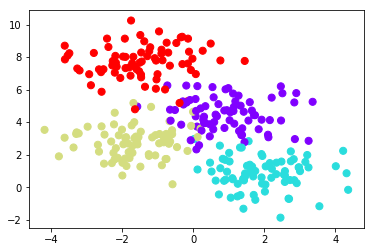

In [110]:
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

A simple decision tree built on this data will iteratively split the data along one or the other axis according to some quantitative criterion, and at each level assign the label of the new region according to a majority vote of points within it. This function shows a visualization of the first four levels of a decision tree classifier for this data:

c:\users\humayra\miniconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)
c:\users\humayra\miniconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)
c:\users\humayra\miniconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)
c:\users\humayra\miniconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


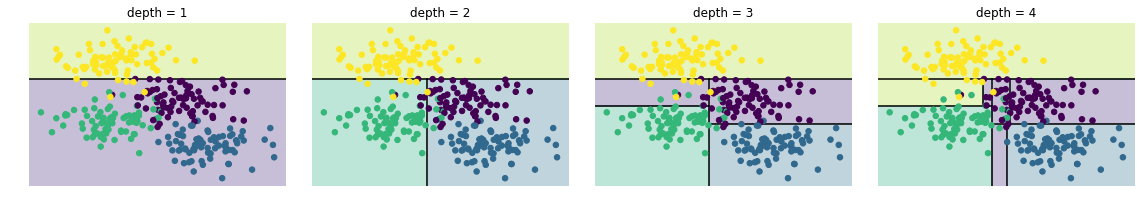

In [111]:
from startup_helper import visualize_tree
        
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

Here, I can see that after the first split, every point in the upper branch remains unchanged, so there is no need to further subdivide this branch. Except for nodes that contain all of one color, at each level every region is again split along one of the two features.


This process of fitting a decision tree to our data can be done in Scikit-Learn with the ``DecisionTreeClassifier`` estimator:

In [100]:
tree = DecisionTreeClassifier().fit(X, y)

Here is a utility function to visualize the output of the classifier

In [101]:
def visualize_classifier(classifier, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    classifier.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

Now we can visualize what the decision tree classification looks like:

c:\users\humayra\miniconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


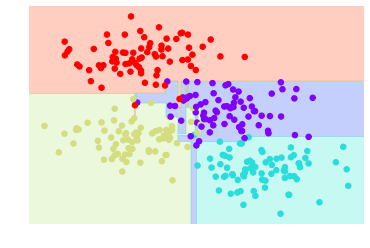

In [102]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [107]:
startup_helper.plot_tree_interactive(X, y);

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

When I change the depth from 1 to 5, as the depth increases, we tend to get very strangely shaped classification regions; for example, at a depth of five, there is a tall and skinny purple region between the yellow and blue regions. It's clear that this is less a result of the true, intrinsic data distribution, and more a result of the particular sampling or noise properties of the data. That is, this decision tree, even at only five levels deep, is clearly over-fitting our data.

Now that you have a reliable way to measure model accuracy, you can experiment with alternative models and see which gives the best predictions. But what alternatives do you have for models?

## Overfitting: 

I have learned in scikit-learn's [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) that the decision tree model has many options. The most important options determine the tree's depth.

Where a model matches the training data almost perfectly, but does poorly in validation and other new data. On the flip side, if we make our tree very shallow, it doesn't divide up the houses into very distinct groups. This situation is called **overfitting**. 

On the other hand, when a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called **underfitting**.

Since we care about accuracy on new data, which we estimate from our validation data, we want to find the sweet spot between underfitting and overfitting. Visually, we want the low point of the (red) validation curve in

![2q85n9s](https://user-images.githubusercontent.com/14244685/78803343-b4bad600-79e0-11ea-9166-10afd3120da2.png)



Now I will try overfitting by increasing the max_depth of my classifier. 

In [55]:
classifier = DecisionTreeClassifier(max_depth=100, random_state=14) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.7231666666666666

So, we can see the accuracy has dropped a lot. 


Such over-fitting turns out to be a general property of decision trees: it is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from.

Another way to see this over-fitting is to look at models trained on different subsets of the data. Here I have trained two different trees, each on half of the original data:

c:\users\humayra\miniconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)
c:\users\humayra\miniconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


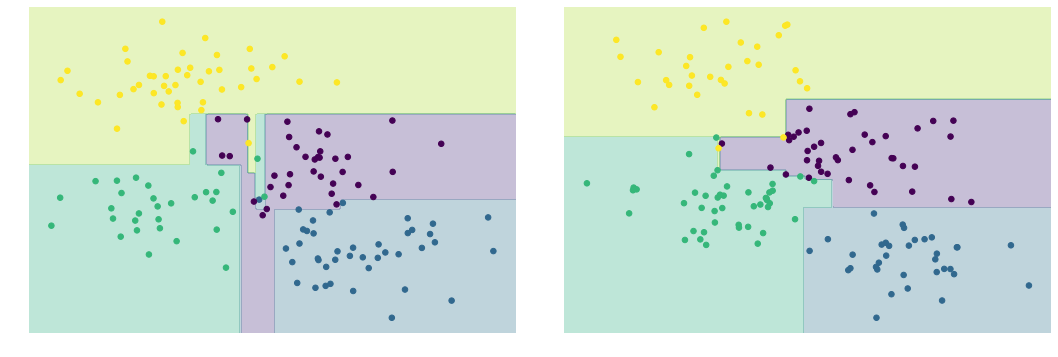

In [112]:
model = DecisionTreeClassifier()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
visualize_tree(model, X[::2], y[::2], boundaries=False, ax=ax[0])
visualize_tree(model, X[1::2], y[1::2], boundaries=False, ax=ax[1])

It is clear that in some places, the two trees produce consistent results (e.g., in the four corners), while in other places, the two trees give very different classifications (e.g., in the regions between any two clusters). The key observation is that the inconsistencies tend to happen where the classification is less certain, and thus by using information from both of these trees, we might come up with a better result.

Here's the takeaway: Models can suffer from either:

**Overfitting:** capturing spurious patterns that won't recur in the future, leading to less accurate predictions, 

**Underfitting:** failing to capture relevant patterns, again leading to less accurate predictions.



Displaying the fits of trees trained on a random subset of the data:

In [113]:
startup_helper.randomized_tree_interactive(X, y)

interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…



To get the better parameters for this model, I am going to use GridSearchCV. 
GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.
Here, the more I complicate the grid, the longer it takes, because it is running it every time with a different combination of parameters.

Parameters I had used for DecisionTreeClassifier: 

- **criterion** can be gini (measures how often a randomly chosen element would be incorrectly identified) or entropy (measures the information contained by each attribute, thus we estimate the reduction in entropy due to sorting on the attribute)
- **max depth** is the maximum amount of steps the tree should do
- **max leaf** nodes maximum number of nodes
- **min_samples_split** a limit to stop further splitting, useful to avoid overfitting

In [38]:
# define the parameters grid
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')
# the cv option will be clear in a few cells

#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.8212916666666666


In [39]:
classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.821

The accuracy got increased **0.07%** just by choosing the right parameters..

To cross validate, I will do another thing. I will use **Kfold**. 

K-fold cross-validation is a systematic process for repeating the train/test split procedure multiple times, in order to reduce the variance associated with a single trial of train/test split.

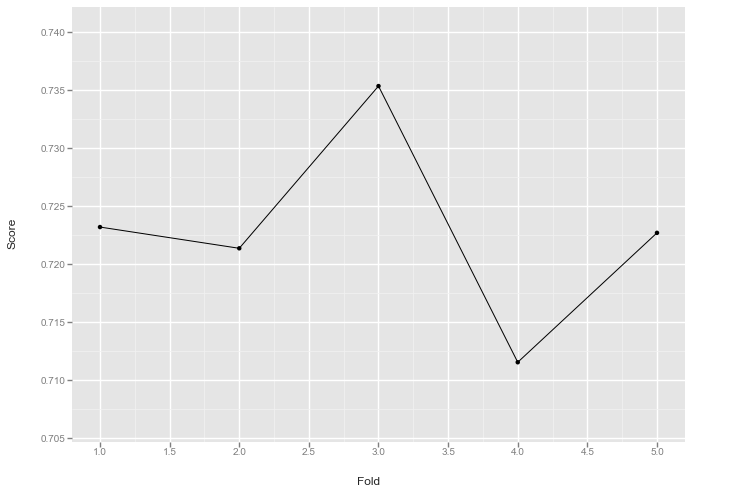

<ggplot: (-9223371941636317219)>


In [166]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['def_pay']
    valid_feats = valid[features]
    valid_label = valid['def_pay']
    classifier.fit(feats,label) #it is the last one we run, the best one
    pred = classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance = pd.DataFrame({'Score':scr,'Fold':fold})
# let's see what we have with ggplot
g = ggplot(performance,aes(x='Fold',y='Score')) + geom_point() + geom_line()
print(g)

Now, this does not mean much now, since it is only one model and, depending on how we split the df into train and test, we get a precision between 0.816 and 0.8275, which may or may not be relevant depending on the purpose of the model. However, in the future, while working on issue #9 I will compare different models in order to find the one more stable.

# Validation curve

Model validation is used to determine how effective an estimator is on data that it has been trained on as well as how generalizable it is to new input.

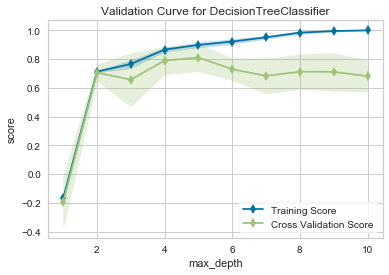

In [167]:
viz = ValidationCurve(
    DecisionTreeClassifier(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

In the above *validation curve*, and we can understand that the training score is everywhere higher than the validation score. This is generally the case: the model will be a better fit to data it has seen than to data it has not seen.

Other than that, 

- For very low model complexity (a high-bias model), the training data is under-fit, which means that the model is a poor predictor both for the training data and for any previously unseen data.
- For very high model complexity (a high-variance model), the training data is over-fit, which means that the model predicts the training data very well, but fails for any previously unseen data.
- For some intermediate value, the validation curve has a maximum. This level of complexity indicates a suitable trade-off between bias and variance.


----


# Final Finding

### This is what we found:
- Credit behaviour, which shows their delay status, is the most important indicator for Default.
    - When payment is delayed more than 2 months, the chances of default goes higher than 50%.
- Demographic data have lower correlation to Default. However we can still look for some indication.
    - Those who Divorce have higher chance of Default.
    - Those with High School level have higher chance of Default.
    - Those age range from 26 to 35, have lower Default rate.
- Some unexplain data to take note, more description and explanation is needed.
    - Some client who Paid in Full in recent month, turn out to be default.
    - Some client have a Negative Bill Amount. But still end up being default.
    - Some client Bill Amount is much higher than their Credit Limit provided.
### From the insights that we gained here, we are able to propose to management a few things:
- To lower the risk of default, must be very cautious on clients payment behaviour.
- More cautious on Divorce and High School level clients.
- Marketing campaign should be aiming on clients' age from 26 to 35.
- Communicate with data collection team.
    - Ensure proper documentation of data description.
    - Reduce data error, check the data collection and tracking system.